#### Import the required modules and set the seed to repeat the analysis

In [50]:
import keras
keras.__version__

'2.0.6'

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from keras.utils import np_utils

np.random.seed(100)
%matplotlib inline

#### cifar_10 dataset consists of 60000 images of 32x32 pixels on 3 channels

In [52]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [53]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [54]:
# Visualize some samples in the training datasets

def sample(X_train, y_train, classes, samples_per_class=6):
    num_classes = len(classes)
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y)    # get all the indexes of cls
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):         # plot the image one by one
            plt_idx = i * num_classes + y + 1  # i*num_classes and y+1 determine the row and column respectively
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()

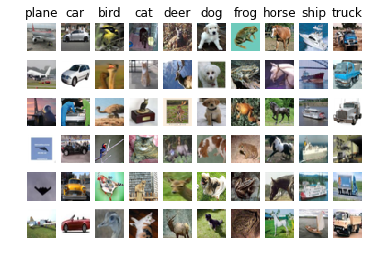

In [55]:
sample(X_train, y_train, classes)

#### Normalize the data and convert the labels to categories

In [56]:
# Normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [57]:
X_train.shape

(50000, 32, 32, 3)

In [58]:
train_x = np.reshape(X_train, (X_train.shape[0], -1))
test_x = np.reshape(X_test, (X_test.shape[0], -1))

In [59]:
train_x.shape

(50000, 3072)

In [60]:
test_x.shape

(10000, 3072)

In [63]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [64]:
y_train.shape

(50000,)

In [65]:
y_test.shape

(10000,)

In [66]:
# Implementation of the Guassian Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

clf = GaussianNB()
gnb = clf.fit(train_x, y_train)
print("Classification is Done.")

Classification is Done.


In [68]:
output_Predicted_gnb = gnb.predict(train_x);
accuracy_train_gnb = metrics.accuracy_score(output_Predicted_gnb, y_train)
print("Accuracy on the train dataset:")
print(accuracy_train_gnb* 100)

output_predicted_validation_gnb = clf.predict(test_x)
accuracy_test_gnb = metrics.accuracy_score(output_predicted_validation_gnb, y_test)
print("Accuracy on the test dataset is:")
print(accuracy_test_gnb * 100)

Accuracy on the train dataset:
28.472
Accuracy on the test dataset is:
29.76


In [70]:
y_pred = y_test
pred_gnb = output_predicted_validation_gnb

In [71]:
from sklearn.metrics import confusion_matrix

conf_mx_gnb = confusion_matrix(y_pred, pred_gnb)
conf_mx_gnb

array([[494,  20,  39,  10,  84,  34,  50,   9, 200,  60],
       [141, 166,  24,  31,  66,  72, 192,  19, 121, 168],
       [225,  24,  83,  15, 292,  48, 209,  21,  54,  29],
       [163,  36,  54,  76, 151, 129, 262,  26,  34,  69],
       [ 86,   8,  57,  26, 417,  38, 265,  22,  50,  31],
       [156,  17,  55,  51, 167, 264, 159,  36,  57,  38],
       [106,   2,  60,  18, 228,  46, 467,  15,  19,  39],
       [134,  24,  36,  41, 228,  94, 102, 131,  72, 138],
       [168,  41,  18,  17,  56,  83,  39,   8, 471,  99],
       [144,  67,  17,  20,  48,  32, 101,  23, 141, 407]])

<IPython.core.display.Javascript object>


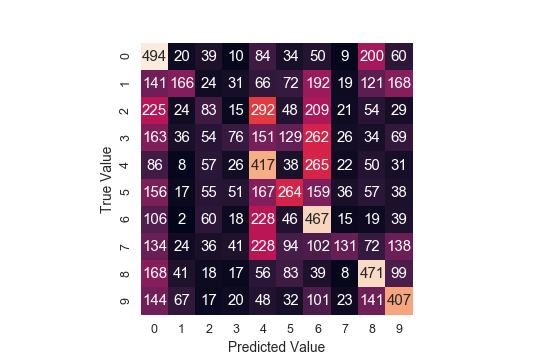

In [74]:
%matplotlib notebook
%matplotlib notebook

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

sns.heatmap(conf_mx_gnb, square=True, annot=True, fmt = 'd', cbar= False)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()